In [1]:
import numpy as np
%matplotlib inline

Operator `initdamp` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `padfunc` run in 0.01 s
Operator `initdamp` run in 0.01 s
Operator `padfunc` run in 0.01 s


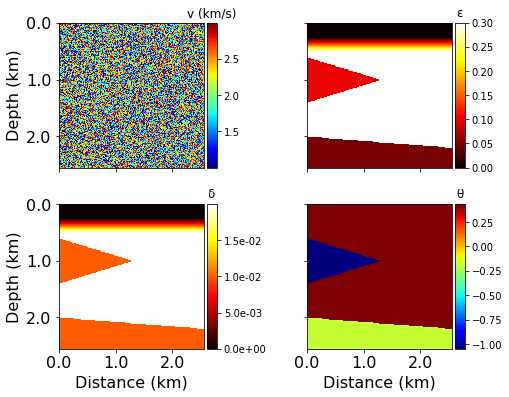

In [2]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, TimeAxis
from plot_parameters import plot

# Define a physical size
shape = (256, 256)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

space_order=8
t0=0.
tn=1500.

#Load the velocity model and thomsem parameters
v = np.fromfile('models/new_models/vel.bin',dtype='float32')
epsilon = np.fromfile('models/new_models/epsilon.bin', dtype=np.float32)
delta = np.fromfile('models/new_models/delta.bin',dtype=np.float32)
theta = np.fromfile('models/new_models/theta.bin', dtype=np.float32)

v = np.reshape(v, shape)
v=1.0+np.random.random(shape)*2.0
epsilon = np.reshape(epsilon, shape)
delta = np.reshape(delta, shape)
theta = np.reshape(theta, shape)

# With the velocity, delta, epsilon, theta, phi and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 40 grid points
model_random= Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=space_order, nbpml=40, epsilon=epsilon, delta=delta,
                  theta=theta)
model_random= Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=space_order, nbpml=40)

plot(v,epsilon,delta,theta)


In [3]:
from devito import Grid,Function,SubDomain

class InnerDomain(SubDomain):
    name = 'inner'
    def define(self, dimensions):
        d = dimensions
        return {d: ('middle', 8, 8) for d in dimensions}
class Left(SubDomain):
    name = 'left'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('left', 2), y: y}
#return {x: ('left', 1), y: ('middle', 1,1)}
class Right(SubDomain):
    name = 'right'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('right', 1), y: ('middle', 1,1)}    
class Top(SubDomain):
    name = 'top'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('middle', 1,1), y: ('right', 1)}    
class Bottom(SubDomain):
    name = 'bottom'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('middle', 1,1), y: ('left', 1)} 
class LB(SubDomain):
    name = 'left-bottom'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('left', 1), y: ('left', 1)}
class RB(SubDomain):
    name = 'right-bottom'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('right', 1), y: ('left', 1)}
class LT(SubDomain):
    name = 'left-top'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('left', 1), y: ('right', 1)}
class RT(SubDomain):
    name = 'right-top'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('right', 1), y: ('right', 1)}
            
ld = Left()    
rd = Right()
td = Top()
bd = Bottom()
lbd = LB()
rbd = RB()
ltd = LT()
rtd = RT()
inner_domain = InnerDomain()

Operator `initdamp` run in 0.01 s
Operator `padfunc` run in 0.01 s


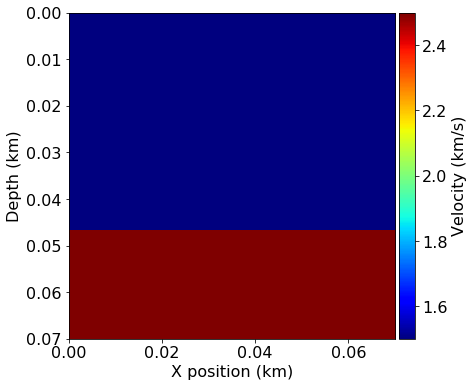

(70, 70)


In [4]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Model, plot_velocity

# Define a physical size
shape = (8, 8)  # Number of grid point (nx, nz)
spacing = (10., 10.)  # Grid spacing in m. The domain size is now 1km by 1km
origin = (0., 0.)  # What is the location of the top left corner. This is necessary to define
# the absolute location of the source and receivers

# Define a velocity profile. The velocity is in km/s
v = np.empty(shape, dtype=np.float32)
v[:, :6] = 1.5
v[:, 6:] = 2.5

# With the velocity and model size defined, we can create the seismic model that
# encapsulates this properties. We also define the size of the absorbing layer as 10 grid points
model = Model(vp=v, origin=origin, shape=shape, spacing=spacing,
              space_order=2, nbpml=2, subdomains=(ld,rd))

#origin_pml = tuple([np.float32(o - s*2) for o, s in zip(origin, spacing)])
#print(origin_pml)
plot_velocity(model)
#--------------
grid = Grid(shape = shape,extent=(70,70),subdomains = (ld))
f = Function(name = 'f', grid = grid,space_order=2)
print(f.grid.extent)

In [5]:
print(model.vp.data)

[[1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 2.5 2.5 2.5 2.5]]


In [6]:
print(model.grid.spacing)

(10.0, 10.0)


In [7]:
print(f.data)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [8]:
print(f.dimensions)
x, y = f.dimensions
print(x.spacing)
print(y.spacing)

(x, y)
h_x
h_y


In [9]:
from devito import Function, Eq, Operator,Grid,SubDomain

eq1 = Eq(f, f+1)
eq2 = Eq(f, f+2, subdomain = grid.subdomains['left'])
eq3=Eq(f,f.laplace)
eqs=[eq3]
op2 = Operator(eqs)
op2.arguments()
#op2()
#print(f.data_with_halo)

{'f': <cparam 'P' (0x7f4571171d30)>,
 'x_m': 0,
 'x_size': 8,
 'x_M': 7,
 'y_m': 0,
 'y_size': 8,
 'y_M': 7,
 'h_x': 10.0,
 'h_y': 10.0,
 'timers': <cparam 'P' (0x7f45716b4e20)>}

In [10]:
damp = Function(name="damp", grid=grid)
print(damp.data)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [11]:
def initialize_damp(damp, nbpml, spacing, mask=False):
    """
    Initialise damping field with an absorbing PML layer.

    Parameters
    ----------
    damp : Function
        The damping field for absorbing boundary condition.
    nbpml : int
        Number of points in the damping layer.
    spacing :
        Grid spacing coefficient.
    mask : bool, optional
        whether the dampening is a mask or layer.
        mask => 1 inside the domain and decreases in the layer
        not mask => 0 inside the domain and increase in the layer
    """
    dampcoeff = 1.5 * np.log(1.0 / 0.001) / (40)

    eqs = [Eq(damp, 1.0)] if mask else []
    x, y = damp.dimensions
    dim_l = SubDimension.left(name='abc_%s_l' % y.name, parent=y,
                                  thickness=nbpml)
    print(dim_l)
    print(y.symbolic_min)
    pos = Abs((nbpml - (dim_l - y.symbolic_min) + 1) / float(nbpml))
    print(pos)
    val = dampcoeff * (pos - sin(2*np.pi*pos)/(2*np.pi))
    print(val)
    val = -val if mask else val
    eqs += [Inc(damp.subs({y: dim_l}), val/y.spacing)]
    for d in damp.dimensions:
        # right
        dim_r = SubDimension.right(name='abc_%s_r' % d.name, parent=d,
                                   thickness=nbpml)
        pos = Abs((nbpml - (d.symbolic_max - dim_r) + 1) / float(nbpml))
        val = dampcoeff * (pos - sin(2*np.pi*pos)/(2*np.pi))
        val = -val if mask else val
        eqs += [Inc(damp.subs({d: dim_r}), val/d.spacing)]

    # TODO: Figure out why yask doesn't like it with dse/dle
    print(eqs)
    op=Operator(eqs, name='initdamp', dse='noop', dle='noop')
    print(op)
    op()

In [12]:
#from examples.seismic import initialize_damp
from devito import SubDimension,Inc
from sympy import sin, Abs
initialize_damp(damp, 2, (10,10), mask=False)

abc_y_l
y_m
Abs(0.5*y_m - 0.5*abc_y_l + 1.5)
-0.0412276274369678*sin(6.28318530717959*Abs(0.5*y_m - 0.5*abc_y_l + 1.5)) + 0.25904082296183*Abs(0.5*y_m - 0.5*abc_y_l + 1.5)
[Inc(damp(x, abc_y_l), (-0.0412276274369678*sin(6.28318530717959*Abs(0.5*y_m - 0.5*abc_y_l + 1.5)) + 0.25904082296183*Abs(0.5*y_m - 0.5*abc_y_l + 1.5))/h_y), Inc(damp(abc_x_r, y), (-0.0412276274369678*sin(6.28318530717959*Abs(-0.5*x_M + 0.5*abc_x_r + 1.5)) + 0.25904082296183*Abs(-0.5*x_M + 0.5*abc_x_r + 1.5))/h_x), Inc(damp(x, abc_y_r), (-0.0412276274369678*sin(6.28318530717959*Abs(-0.5*y_M + 0.5*abc_y_r + 1.5)) + 0.25904082296183*Abs(-0.5*y_M + 0.5*abc_y_r + 1.5))/h_y)]


Operator `initdamp` run in 0.01 s


#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int initdamp(struct dataobj *restrict damp_vec, const float h_x, const float h_y, const int x_M, const int y_M, const int y_m, const int abc_x_r_rtkn, const int abc_y_l_ltkn, const int abc_y_r_rtkn, struct profiler * timers, const int x_m)
{
  float (*restrict damp)[damp_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[damp_vec->size[1]]) damp_vec->data;
  struct timeval start_section0, end_section0;
  gettimeofday(&start_section0, NULL);
  /* Begin section0 */
  for (int x = x_m; x <= x_M; x += 1)
  {
    for (int abc_y_l = y_m; abc_y_l <= abc_y_l_ltkn + y_m - 1; abc_y_l += 1)
    {
      damp[x + 1][abc_y_l + 1] += (-4.12276274369678e-2F*sin(6.28318530717959F*fabs(5.0e-1F*y_m - 5.0e-1F*abc_y_l + 1.5F)) + 2.5904

In [13]:
print(damp.data)

[[0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.03885613 0.02590408 0.         0.         0.         0.
  0.02590408 0.03885613]
 [0.06476021 0.05180816 0.02590408 0.02590408 0.02590408 0.02590408
  0.05180816 0.06476021]
 [0.07771225 0.06476021 0.03885613 0.03885613 0.03885613 0.03885613
  0.06476021 0.07771225]]


In [14]:
print(damp.data_with_halo)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.03885613 0.02590408 0.         0.         0.
  0.         0.02590408 0.03885613 0.        ]
 [0.         0.06476021 0.05180816 0.02590408 0.02590408 0.02590408
  0.02590408 0.05180816 0.06476021 0.        ]
 [0.         0.07771225 0.06476021 0.03885613 0.03885613 0.03885613
  0.03885613 0.06476021 0.07771225 0.        ]
 [0.         0.      

In [15]:
from examples.seismic import TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

In [16]:
print(model.domain_size)
print(f.grid.extent[0])

(70.0, 70.0)
70


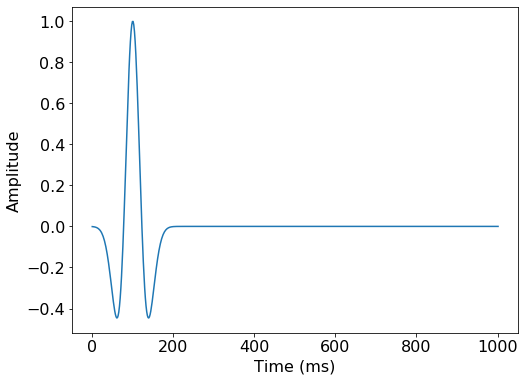

In [17]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import RickerSource

f0 = 0.010  # Source peak frequency is 10Hz (0.010 kHz)
src = RickerSource(name='src', grid=grid, f0=f0,
                   npoint=1, time_range=time_range)

# First, position source centrally in all dimensions, then set depth
src.coordinates.data[0, :] = np.array(f.grid.extent) * .5
src.coordinates.data[0, -1] = 10.  # Depth is 20m

# We can plot the time signature to see the wavelet
src.show()

In [18]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import Receiver

# Create symbol for 101 receivers
rec = Receiver(name='rec', grid=f.grid, npoint=8, time_range=time_range)

# Prescribe even spacing for receivers along the x-axis
rec.coordinates.data[:, 0] = np.linspace(0, f.grid.extent[0], num=8)
rec.coordinates.data[:, 1] = 10.  # Depth is 20m

In [23]:
from devito import TimeFunction

# Define the wavefield with the size of the model and the time dimension
u = TimeFunction(name="u", grid=f.grid, time_order=2, space_order=2)
#u = Function(name="u", grid=f.grid, space_order=2)

In [24]:
u.dx2 + u.dy2

Derivative(u(t, x, y), (x, 2)) + Derivative(u(t, x, y), (y, 2))

In [25]:
pde= u.laplace
eqn=Eq(u,pde)

op = Operator(eqn,subs=model.spacing_map)
print(op)

#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
} ;


int Kernel(const float h_x, const float h_y, struct dataobj *restrict u_vec, const int time_M, const int time_m, struct profiler * timers, const int x_M, const int x_m, const int y_M, const int y_m)
{
  float (*restrict u)[u_vec->size[1]][u_vec->size[2]] __attribute__ ((aligned (64))) = (float (*)[u_vec->size[1]][u_vec->size[2]]) u_vec->data;
  /* Flush denormal numbers to zero in hardware */
  _MM_SET_DENORMALS_ZERO_MODE(_MM_DENORMALS_ZERO_ON);
  _MM_SET_FLUSH_ZERO_MODE(_MM_FLUSH_ZERO_ON);
  for (int time = time_m, t0 = (time)%(3); time <= time_M; time += 1, t0 = (time)%(3))
  {
    struct timeval start_section0, end_section0;
    gettimeofday(&start_section0, NULL);
    /* B

In [26]:
pde = (1/(f*f))*u.dt2 - u.laplace + damp * u.dt
pde

damp(x, y)*Derivative(u(t, x, y), t) - Derivative(u(t, x, y), (x, 2)) - Derivative(u(t, x, y), (y, 2)) + Derivative(u(t, x, y), (t, 2))/f(x, y)**2

In [27]:
from devito import Eq, solve

stencil = Eq(u.forward, solve(pde, u.forward))

In [28]:
# Finally we define the source injection and receiver read function to generate the corresponding code
src_term = src.inject(field=u.forward, expr=src * dt**2 / f)

# Create interpolation expression for receivers
rec_term = rec.interpolate(expr=u.forward)

In [29]:
#NBVAL_IGNORE_OUTPUT
from devito import Operator

op = Operator([stencil]+ rec_term)
print(op)

#define _POSIX_C_SOURCE 200809L
#include "stdlib.h"
#include "math.h"
#include "sys/time.h"
#include "xmmintrin.h"
#include "pmmintrin.h"

struct dataobj
{
  void *restrict data;
  int * size;
  int * npsize;
  int * dsize;
  int * hsize;
  int * hofs;
  int * oofs;
} ;

struct profiler
{
  double section0;
  double section1;
} ;


int Kernel(struct dataobj *restrict damp_vec, const float dt, struct dataobj *restrict f_vec, const float h_x, const float h_y, const float o_x, const float o_y, struct dataobj *restrict rec_vec, struct dataobj *restrict rec_coords_vec, struct dataobj *restrict u_vec, const int x_M, const int x_m, const int y_M, const int y_m, const int p_rec_M, const int p_rec_m, const int time_M, const int time_m, struct profiler * timers)
{
  float (*restrict damp)[damp_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[damp_vec->size[1]]) damp_vec->data;
  float (*restrict f)[f_vec->size[1]] __attribute__ ((aligned (64))) = (float (*)[f_vec->size[1]]) f_vec->data;

In [ ]:
#NBVAL_IGNORE_OUTPUT
op(time=time_range.num-1, dt=model.critical_dt)

In [ ]:
#NBVAL_IGNORE_OUTPUT
from examples.seismic import plot_shotrecord

plot_shotrecord(rec.data, model, t0, tn)

In [ ]:
result1 = slice(3)
print(result1)
result2 = slice(1, 5, 2)
print(slice(1, 5, 2))

In [ ]:
slices = tuple([slice(2, -2) for _ in range(f.grid.dim)])
print(slices)
f.data[slices] = 4

In [ ]:
print(f.data_with_halo)

In [ ]:
print(f.grid.dim)
x, y = model.space_dimensions[:2]
t = model.grid.stepping_dim
#pde= (u[t,x+2,y+3]+u[t,x+2,y+1]+u[t,x+3,y+2])-u[t,x+2,y+2]
pde= f.laplace
eqn=Eq(f,pde)

op = Operator(eqn,subs=model.spacing_map)()
#op.arguments()
#print(op)

In [ ]:
print(f.data_with_halo)

In [ ]:
print(model.damp.data)

In [ ]:
print(model.vp.data_with_halo)

In [ ]:
print(model.damp.data_with_halo)

In [ ]:
model.grid.subdomains

In [ ]:
print(model.grid.subdomains['domain'].shape)
print(model.grid.subdomains['interior'].shape)
print(model.grid.subdomains['left'].shape)
print(model.grid.subdomains['right'].shape)
print(model.grid.subdomains['phydomain'].shape)

In [ ]:
from devito import Function, Eq, Operator,Grid,SubDomain

class Left(SubDomain):
    name = 'left'
    def define(self, dimensions):
        x, y = dimensions
        return {x: ('left', 1), y: ('middle', 1,1)}
ld = Left()
grid = Grid(shape = (10, 10), subdomains = (ld))
f = Function(name = 'f', grid = grid)
print(f.grid.subdomains['domain'].shape)
print(f.grid.subdomains['interior'].shape)
print(f.grid.subdomains['left'].shape)
eq1 = Eq(f, f+20, subdomain = f.grid.subdomains['left'])
op2 = Operator(eq1)()
print(f.data)

In [ ]:
f.data

In [ ]:
from examples.seismic import Model, AcquisitionGeometry, TimeAxis

t0 = 0.  # Simulation starts a t=0
tn = 1000.  # Simulation last 1 second (1000 ms)
dt = model.critical_dt  # Time step from model grid spacing

time_range = TimeAxis(start=t0, stop=tn, step=dt)

nshots=1
src_coordinates = np.empty((nshots, 2), dtype=np.float32)
src_coordinates[:, 0] = np.linspace(0., 2550, num=nshots)
src_coordinates[0, :] = np.array(model.domain_size) * .5

src_coordinates[0, -1] = model.origin[-1] + 2 * spacing[-1]
print(src_coordinates)
nrec = shape[0]
rec_coordinates = np.empty((nrec, len(spacing)))
rec_coordinates[:, 0] = np.linspace(0., model.domain_size[0], num=nrec)
rec_coordinates[:, 1] = np.array(model.domain_size)[1] * .5
rec_coordinates[:, -1] = model.origin[-1] + 2 * spacing[-1]

geometry = AcquisitionGeometry(model, rec_coordinates, src_coordinates,
                                   t0=t0, tn=tn, src_type='Ricker', f0=0.01)

print(dt)
print(time_range.num)

# We can plot the time signature to see the wavelet
geometry.src.show()

In [ ]:
#grid = Grid(shape=(nrec,time_range.num))
#grid.subdomains

In [ ]:
from devito import Function, Eq, Operator
grid = Grid(shape = (10, 10), subdomains = (ld, rd, td, bd, lbd, rbd, ltd, rtd))
f = Function(name = 'f', grid = grid)

print(grid.subdomains['domain'].shape)
print(grid.subdomains['interior'].shape)
print(grid.subdomains['left'].shape)
print(grid.subdomains['right'].shape)

In [ ]:
eq1 = Eq(f, f+1, subdomain = grid.subdomains['left'])
eq2 = Eq(f, f+2, subdomain = grid.subdomains['right'])
eq3 = Eq(f, f+3, subdomain = grid.subdomains['top'])
eq4 = Eq(f, f+4, subdomain = grid.subdomains['bottom'])
eq5 = Eq(f, f+10, subdomain = grid.subdomains['left-bottom'])
eq6 = Eq(f, f+20, subdomain = grid.subdomains['right-bottom'])
eq7 = Eq(f, f+30, subdomain = grid.subdomains['left-top'])
eq8 = Eq(f, f+40, subdomain = grid.subdomains['right-top'])

In [ ]:
print(grid.subdomains['domain'].shape)
print(grid.subdomains['interior'].shape)
print(grid.subdomains['left'].shape)
print(grid.subdomains['right'].shape)

In [ ]:
#NBVAL_IGNORE_OUTPUT
eqs=[eq2, eq3, eq5, eq6, eq7, eq8]
print(eqs)
op2 = Operator(eqs)
print(op2)
op2

In [ ]:
f.data

In [ ]:
from devito import TimeFunction, Eq, solve, Operator
from sympy import Symbol

#Subs = ['left', 'right']

u = TimeFunction(name="u", grid=model.grid, time_order=2, space_order=2)
#eqns = [Eq(model.m * u.dt2 - u.laplace, subdomain=i) for i in Subs]
#stencil=[Eq(u.forward,solve(e,u.forward)) for e in eqns]

eqn1=Eq(u.forward,model.m * u.dt2 - u.laplace, subdomain=model.grid.subdomains['left'])
eqn2=Eq(u.forward,model.m * u.dt2 - u.laplace, subdomain=model.grid.subdomains['right'])
eqns=[eqn1,eqn2]
x, y = model.space_dimensions[:2]
t = model.grid.stepping_dim
pde= (u[t,x+2,y+3]+u[t,x+2,y+1]+u[t,x+3,y+2])-u[t,x+2,y+2]

eqn=Eq(u,pde,subdomain=model.grid.subdomains['left'])

op = Operator(eqn,subs=model.spacing_map)
#op.args
print(op)
# We can now write the PDE
#pde = [Eq(model.m * u.dt2 - u.laplace, subdomain=i) for i in Subs]
#print(pde)
#stencil =[Eq(u.forward,solve(e,u.forward)) for e in pde]
#op = Operator([stencil])

In [ ]:
f = Function(name='data_rand', grid=grid,)
g = Function(name='data_copy', grid=grid)
new_grid=Grid(shape=model.shape, subdomains = (inner_domain,))
h = Function(name='model_copy',grid=new_grid)

f.data[:]=np.random.random(f.shape)
g.data[:]=f.data[:]
print(h.shape)
print(model.vp.shape)
#h.data[:]=model.vp.data[:]

In [ ]:
print(h.grid.subdomains['domain'].shape)
print(h.grid.subdomains['interior'].shape)
print(h.grid.subdomains['inner'].shape)